# Linear Classifiers in Python

## Applying logistic regression and SVM

### Running LogisticRegression and SVC

In [10]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression(solver='lbfgs', max_iter=1500, multi_class='auto')
lr.fit(Xtrain, ytrain)
print(lr.score(Xtrain, ytrain))
print(lr.score(Xtest, ytest))

# Apply SVM and print scores
svm = SVC(gamma='scale')
svm.fit(Xtrain, ytrain)
print(svm.score(Xtrain, ytrain))
print(svm.score(Xtest, ytest))

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1.0
0.9644444444444444
1.0
0.9888888888888889


## Loss functions

Since logistic regression and SVMs are both linear classifiers, the raw model output is a linear function of x.

the coefficients determine the slope of the boundary and the intercept shifts it.

### Minimizing a loss function

In [ ]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        #  the loss function for least squares linear regression
        s = s + (y_i_pred - y_i_true)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

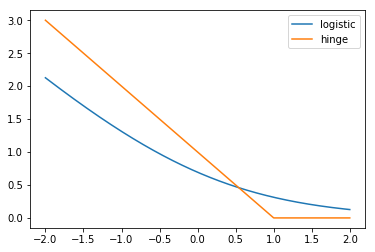

In [13]:
# Mathematical functions for logistic and hinge losses
# Feel free to ignore if you're not interested
def log_loss(raw_model_output):
    return np.log(1+np.exp(-raw_model_output))

def hinge_loss(raw_model_output):
    return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

### Implementing logistic regression

In [14]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()

In [15]:
X, y = cancer.data, cancer.target

In [16]:
X.shape

(569, 30)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X = pca.fit_transform(X)

In [20]:
X.shape

(569, 10)

In [21]:
y.shape

(569,)

In [22]:
from scipy.optimize import minimize

In [24]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(len(X)):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression , to less regularation or disable regularisation set C to 1000000
lr = LogisticRegression(solver='lbfgs', fit_intercept=False, C=1000000).fit(X,y)

print(lr.coef_)

[ 1.16014257e+03 -2.93917544e+02  4.85783976e+01 -8.71197531e+00
  3.20004861e+01  1.26541481e+00  9.31336973e-01  1.48167035e-01
  7.45463100e-01  5.89359489e-01]
[[-0.01669621  0.01763513 -0.0929467   0.34402658 -0.04602582 -0.04288792
  -0.56791951  2.07671383 -1.59946484  2.38071891]]


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


As you can see, logistic regression is just minimizing the loss function we've been looking at

## Logistic regression


In [28]:
digits = datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [29]:
X_train.shape

(1347, 64)

### Regularized logistic regression

In [38]:
train_errs, valid_errs = [], []

In [35]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warn

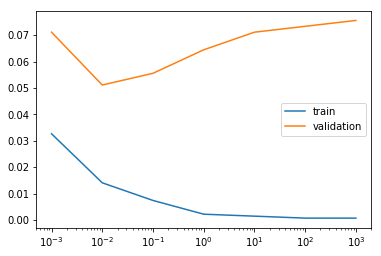

In [39]:
# Loop over values of C
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_test, y_test) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

In [42]:
lr.coef_.shape

(10, 64)

In [41]:
lr.coef_.flatten().shape

(640,)

### Logistic regression and feature selection

In [ ]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})

searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

```txt
Best CV params {'C': 1}
Total number of features: 2500
Number of selected features: 1219
```

### Identifying the most positive and negative words

In [ ]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

```txt
Most positive words: favorite, superb, noir, knowing, loved, 
    
Most negative words: disappointing, waste, worst, boring, lame,
```

### Regularization and probabilities

In [ ]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

Maximum predicted probability 0.8990965659596716

smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function. 

### Visualizing easy and difficult examples

In [ ]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

### Fitting multi-class logistic regression

In [43]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


OVR training accuracy: 0.9977728285077951
OVR test accuracy    : 0.9355555555555556
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9511111111111111


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Visualizing multi-class logistic regression

In [ ]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

### One-vs-rest SVM

In [ ]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)

The non-linear SVM works fine with one-vs-rest on this dataset because it learns to "surround" class 1.

## Support Vector Machines


In [45]:
X, y = datasets.load_wine(return_X_y=True)

In [48]:
X = X[:,2]

In [50]:
y.shape

(178,)

In [ ]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X, y)

plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

### GridSearchCV warm-up

In [ ]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, param_grid=parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

```txt
Best CV params {'gamma': 0.001}
```

### Jointly tuning gamma and C with GridSearchCV

In [ ]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, param_grid=parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

```txt
Best CV params {'C': 10, 'gamma': 0.0001}
Best CV accuracy 0.9988864142538976
Test accuracy of best grid search hypers: 0.9988876529477196
```

### Using SGDClassifier

In [ ]:
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

```txt
Best CV params {'penalty': 'l1', 'alpha': 0.0001, 'loss': 'hinge'}
Best CV accuracy 0.94351630867144
Test accuracy of best grid search hypers: 0.9592592592592593
```

`SGDClassifier` is that it's very fast - this would have taken a lot longer with `LogisticRegression` or `LinearSVC`.